<a href="https://colab.research.google.com/github/Aclaude25/Weather_App/blob/main/Music_Recommandation_System1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Système de Recommandation Musicale en utilisant le Dataset de Spotify



In [ ]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from yellowbrick.target import FeatureCorrelation

warnings.simplefilter('ignore')

Reading Data

In [ ]:
data = pd.read_csv('data.csv')
data_by_gender = pd.read_csv('data_by_genres.csv')
data_by_year = pd.read_csv('data_by_year.csv')

In [ ]:
# Informations sur les données
print("DATA")
data.info()

print('\n')
print("DATA BY GENDER")
data_by_gender.info()

print('\n')
print("DATA BY YEAR")
data_by_year.info()

DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date   

Exploratory Data Analysis (EDA)

Evolution de la musique dans le temps

In [ ]:
data.describe()

valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.698270e+05       0.255000       0.000000          0.000000   
50%    2.074670e+05       0.471000       0.000000          0.000216   
75%    2.624000e+05       0.703000       0.000000          0.102000   
max    5.403500e+06       1.000000       1.000000          1.000000   

                 key       liveness       loudness           mode  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        5.199844       0.205839     -11.467990       0.706902   
std         3.515094       0.174805       5.697943       0.455184   
min         0.000000       0.000000     -60.000000       0.000000   
25%         2.000000       0.098800     -14.615000       0.000000   
50%         5.000000       0.136000     -10.580000       1.000000   
75%         8.000000       0.261000      -7.183000       1.000000   
max        11.000000       1.000000       3.855000       1.000000   

          popularity    speechiness          tempo  
count  170653.000000  170653.000000  170653.000000  
mean       31.431794       0.098393     116.861590  
std        21.826615       0.162740      30.708533  
min         0.000000       0.000000       0.000000  
25%        11.000000       0.034900      93.421000  
50%        33.000000       0.045000     114.729000  
75%        48.000000       0.075600     135.537000  
max       100.000000       0.970000     243.507000

Nous allons voir l'evolution de la musique au cours des différentes décennies de 1921 à 2020

<Axes: xlabel='decade', ylabel='count'>

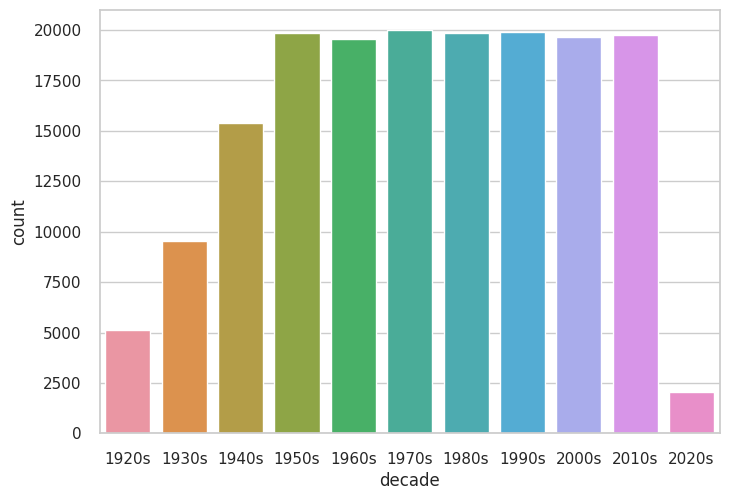

In [ ]:
def get_decennie(annee):
    period = int(annee/10) * 10
    decade = '{}s'.format(period)
    return decade

data['decade'] = data['year'].apply(get_decennie)
sns.countplot(x=data["decade"])

Pour la suite, nous allons étudier la corrélation entre les différentes caractéristiques de musique et la popularité de celle-ci

<Axes: >

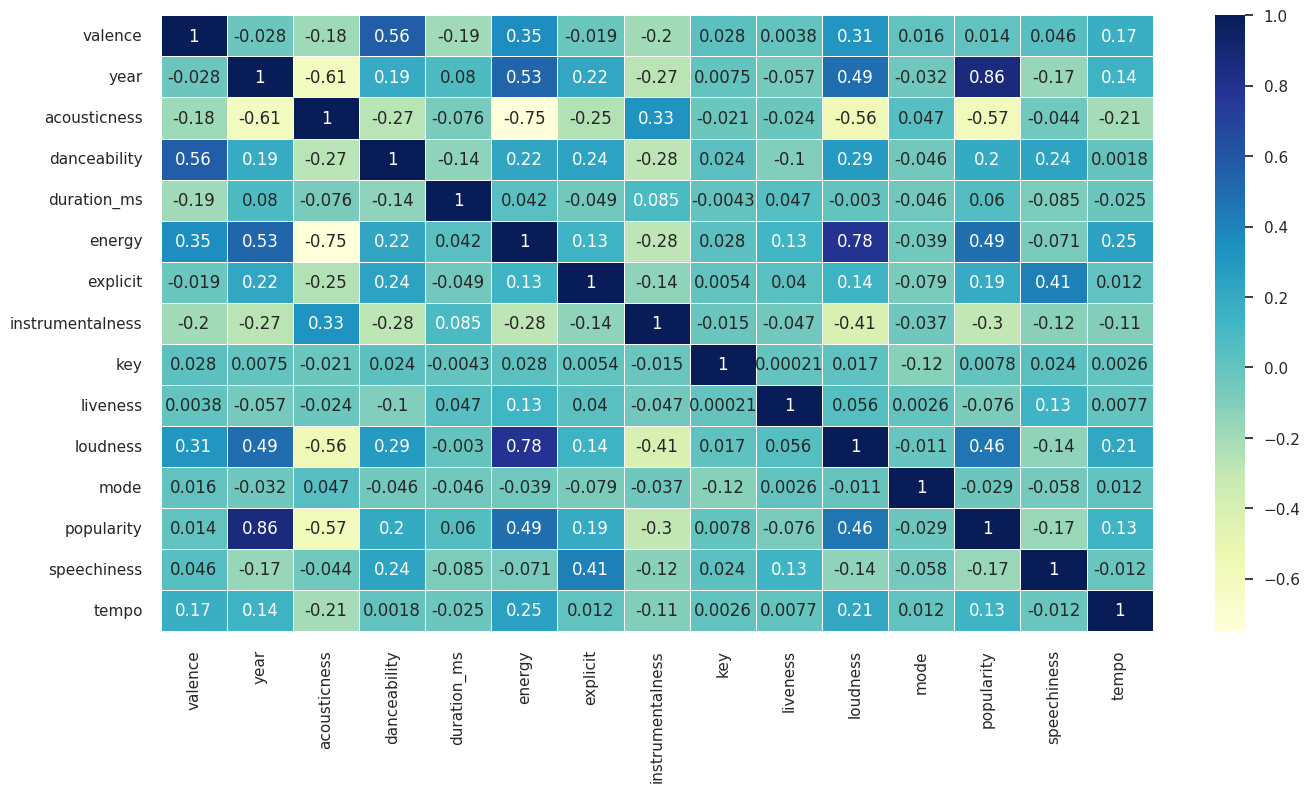

In [ ]:
del_element = ['artists', 'id', 'name', 'release_date', 'decade']
features_name = [col for col in data.columns if not col in del_element]

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data[features_name].corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu", linewidth=.5)

Etant donnée que cet affichage soit difficilement lisible, nous allons utiliser un package pour mieux voir les corrélations. Il s'agit du package YellowBrick.

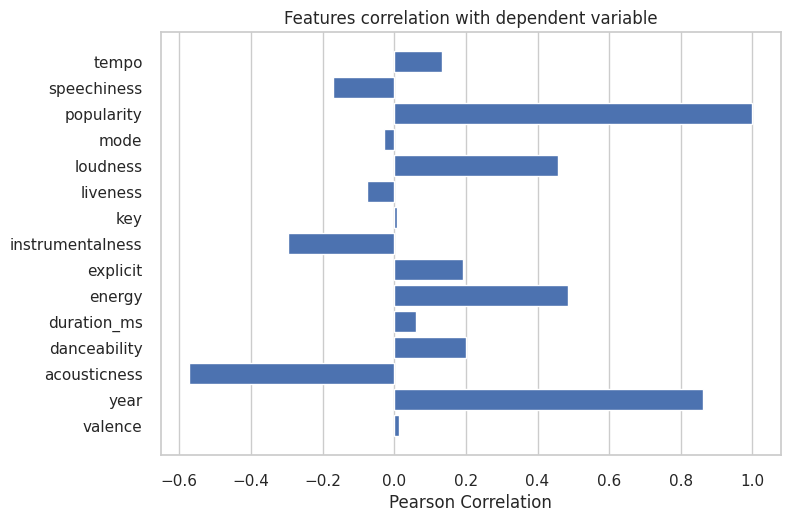

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
X, y = data[features_name], data['popularity']
features = np.array(features_name)
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)
visualizer.show()

- La popularité est fortement corrélée à l'année de publication. Comme l'algorithme Spotify détermine la popularité d'une chanson, il génère sa métrique de "popularité" en fonction de la date à laquelle les flux de la chanson sont récents, et pas seulement du nombre total de flux que la chanson a reçus.
- L'énergie semble jouer un rôle dans l'influence de la popularité d'une chanson avec un rapport de corrélation d'environ 0,5. De nombreuses chansons populaires sont énergiques, mais ne sont pas nécessairement une bonne chanson pour danser. Comme la corrélation de la danse n'est pas si élevée. Cependant, si une chanson a peu d'énergie, cela ne garantit pas qu'elle ne sera pas une chanson populaire.
- En regardant la corrélation, nous pouvons voir que l'acoustique est la moins corrélée à la popularité, avec un score de -0,59, ce qui est logique car les chansons populaires ont récemment des instruments électriques ou contiennent une certaine influence de remix. Il est rare de trouver des chansons populaires jouées par un orchestre ou tout simplement acoustique par rapport à la grande majorité.

Evolution des caractéristiques de musique de 1920 à 2020

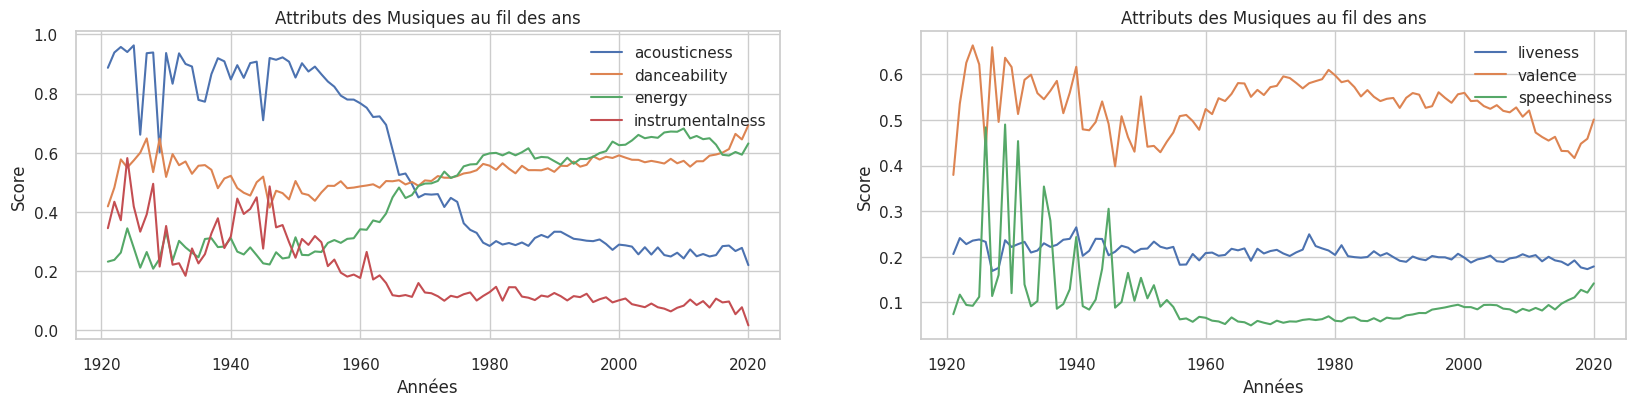

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
sns.set(style="whitegrid")
target_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness']
target_cols2 = ['liveness', 'valence', 'speechiness']
for col in target_cols:
    x = data_by_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index, y=x, label=col, ax = axes[0])
    ax.set_title('Attributs des Musiques au fil des ans')
    ax.legend(fancybox=True, framealpha=1, shadow=True, loc = 'upper right')
    ax.set_ylabel('Score')
    ax.set_xlabel('Années')

for col in target_cols2:
    x = data_by_year.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index, y=x, label=col, ax = axes[1])
    ax.set_title('Attributs des Musiques au fil des ans')
    ax.legend(fancybox=True, framealpha=1, shadow=True, loc = 'upper right')
    ax.set_ylabel('Score')
    ax.set_xlabel('Années')

Text(0.5, 0, 'Années')

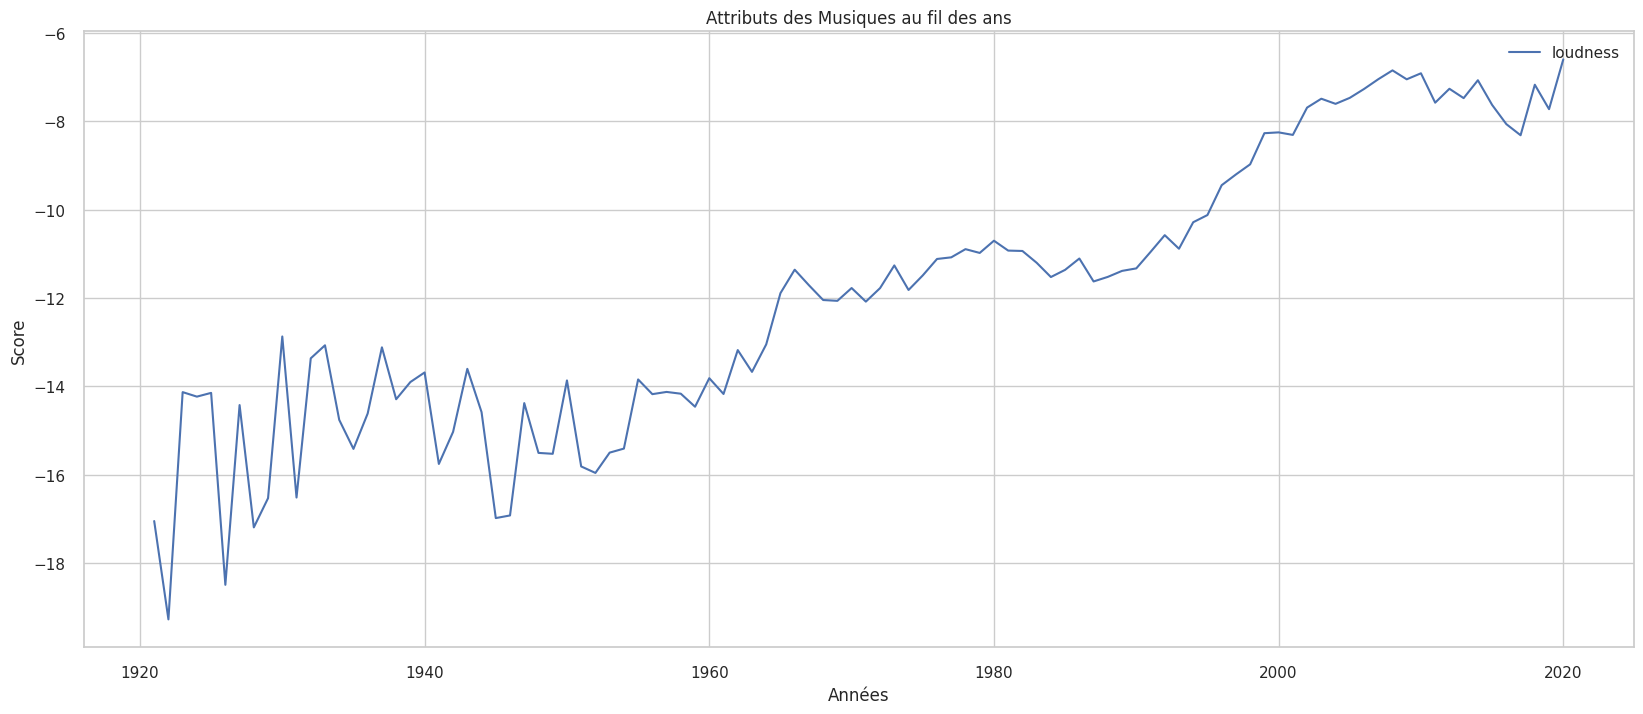

In [ ]:
# Loudness
plt.figure(figsize=(20, 8
                    ))
x = data_by_year.groupby("year")['loudness'].mean()
ax= sns.lineplot(x=x.index, y=x, label='loudness')
ax.set_title('Attributs des Musiques au fil des ans')
ax.legend(fancybox=True, framealpha=1, shadow=True, loc = 'upper right')
ax.set_ylabel('Score')
ax.set_xlabel('Années')

Les 10 song les plus populaires et leurs caractéristiques

In [ ]:
plt.figure(figsize=(20, 8))
top_10 = data_by_gender.nlargest(10, 'popularity')
cols = ['acousticness', 'danceability', 'energy', 'liveness', 'valence', 'speechiness']
figure = px.bar(top_10, x='genres', y=cols, barmode='group')
figure.show()

<Figure size 2000x800 with 0 Axes>

Clustering Phase

Gender Clustering (Kmeans)

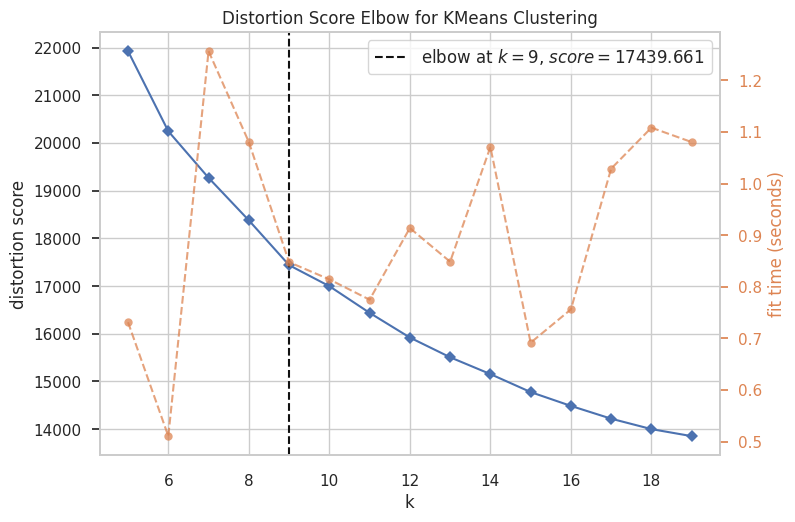

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer

copy_gender_data = data_by_gender.select_dtypes(exclude='object')

# Standardisation des données
scaler = StandardScaler()
scale_data = scaler.fit_transform(copy_gender_data)
gender_data_scaled = pd.DataFrame(scale_data, columns=copy_gender_data.columns)

# Recherche de la meilleure valeur de K

X = gender_data_scaled.drop('popularity', axis=1)
y = data_by_gender['popularity']

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
# Pipeline
kmeans_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = data_by_gender.select_dtypes(exclude='object')
kmeans_pipeline.fit(X)
data_by_gender['cluster'] = kmeans_pipeline.predict(X)

In [ ]:
# Visualisation avec t-SNE
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
gender_data_embedded = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(data=gender_data_embedded, columns=['X', 'Y'])
projection['genres'] = data_by_gender['genres']
projection['cluster'] = data_by_gender['cluster']
figure = px.scatter(projection, x='X', y='Y', color='cluster')
figure.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.006s...
[t-SNE] Computed neighbors for 2973 samples in 0.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106262
[t-SNE] KL divergence after 1000 iterations: 1.391911


Song Clustering avec le PCA

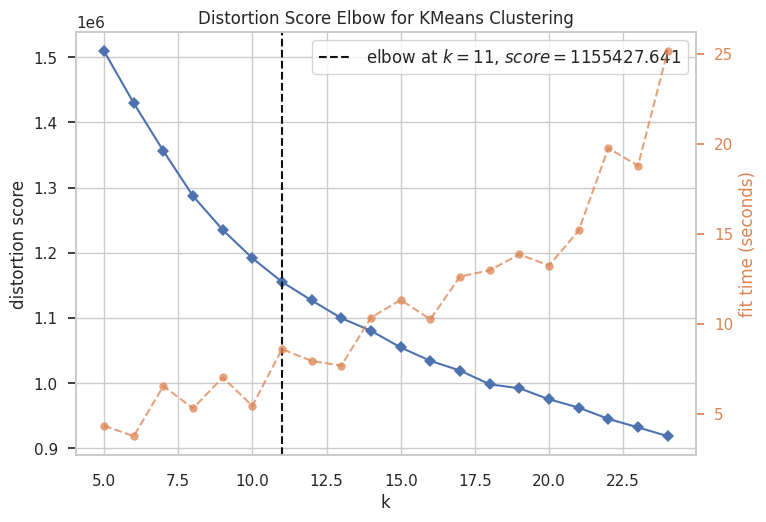

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
copy_data = data.select_dtypes(exclude='object')

# Standardisation des données
scaler = StandardScaler()
scale_data = scaler.fit_transform(copy_data)
data_scaled = pd.DataFrame(scale_data, columns=copy_data.columns)

# Recherche de la meilleure valeur de K

X = data_scaled.drop('popularity', axis=1)
y = data_by_gender['popularity']

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,25))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
song_cluster_pipeline = Pipeline([
                                  ('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=13,verbose=False))
                                ], verbose=False)

X = data.select_dtypes(exclude='object')
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
# Visualisation avec l'Analyse en Composantes Principales
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedded = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['X', 'Y'], data=song_embedded)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(projection, x='X', y='Y', color='cluster')
fig.show()

Modélisation du Système de Recommandation

Nous allons l'API de spotify, celà nous permettra d'interroger le catalogue pour les chansons. Pour celà nous aurons besoin de spotipy

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from scipy.spatial.distance import cdist

In [ ]:
SPOTIFY_CLIENT_ID = "ba1c6d87ebb140e995c69713b3e4d258"
SPOTIFY_CLIENT_SECRET = "0c74f6ce8f93462aa91fc8c68ae16c99"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET))
sp

In [ ]:
features_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit','instrumentalness',
                 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)


# Définition de la fonction pour récupérer les données d'une chanson à partir des informations fournies
def get_song_data(song_info, spotify_data):
    """
    Cette fonction prend les informations d'une chanson (nom et année) et une base de données Spotify (DataFrame) en entrée.
    Elle renvoie les données de la chanson à partir de la base de données si elle existe, sinon elle renvoie None.

    Paramètres :
        - song_info : Un dictionnaire contenant les informations de la chanson avec les clés 'name' (nom) et 'year' (année).
        - spotify_data : DataFrame contenant les données de chansons Spotify.

    Renvoie :
        - Les données de la chanson à partir de la base de données si elle existe, sinon None.
    """

    try:
      song_data = spotify_data[(spotify_data['name'] == song_info['name']) & (spotify_data['year'] == song_info['year'])].iloc[0]
      return song_data

    except IndexError:
        return find_song(song_info['name'], song_info['year'])


# Définition de la fonction pour obtenir le vecteur moyen des chansons à partir d'une liste de chansons
def get_mean_vector(song_list, spotify_data):
    """
    Cette fonction prend une liste de dictionnaires représentant les chansons et une base de données Spotify (DataFrame) en entrée.
    Elle récupère les données de chaque chanson à partir de la base de données et calcule le vecteur moyen des chansons.

    Paramètres :
        - song_list : Une liste de dictionnaires représentant les chansons, chaque dictionnaire contient les informations 'name' (nom) et 'year' (année) d'une chanson.
        - spotify_data : DataFrame contenant les données de chansons Spotify.

    Renvoie :
        - Le vecteur moyen des chansons.
    """

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print(f"{song['name']} n'existe pas sur Spotify ou dans notre BD")
            continue
        song_vector = song_data[features_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


# Définition de la fonction pour aplatir une liste de dictionnaires en un dictionnaire
def flatten_dict_list(dict_list):
    """
    Cette fonction prend une liste de dictionnaires en entrée et la transforme en un seul dictionnaire.

    Paramètres :
        - dict_list : Une liste de dictionnaires.

    Renvoie :
        - Un dictionnaire avec les clés de chaque dictionnaire de la liste et les valeurs correspondantes sous forme de liste.
    """

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


# Définition de la fonction pour recommander des chansons similaires en fonction d'une liste de chansons
def recommend_songs(song_list, spotify_data, n_songs=10):
    """
    Cette fonction prend une liste de dictionnaires représentant les chansons, une base de données Spotify (DataFrame) et un nombre facultatif de chansons à recommander en entrée.
    Elle recommande des chansons similaires en fonction de la liste de chansons fournies.

    Paramètres :
        - song_list : Une liste de dictionnaires représentant les chansons, chaque dictionnaire contient les informations 'name' (nom) et 'year' (année) d'une chanson.
        - spotify_data : DataFrame contenant les données de chansons Spotify.
        - n_songs : Nombre de chansons à recommander (par défaut 10).

    Renvoie :
        - Une liste de dictionnaires représentant les chansons recommandées avec les informations 'name' (nom), 'year' (année) et 'artists' (artistes) de chaque chanson.
    """

    metadata_cols = ['name', 'year', 'artists']  # Les colonnes à inclure dans les données des chansons recommandées
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]  # Assurez-vous que "song_cluster_pipeline" est défini avec un pipeline complet de prétraitement de données
    scaled_data = scaler.transform(spotify_data[features_cols])  # Assurez-vous que "features_cols" est correctement défini
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]

    return rec_songs[metadata_cols].to_dict(orient='records')


In [ ]:
recommend_songs([{'name': 'Dior', 'year':2019}],  data)

[{'name': 'Dior - Bonus', 'year': 2020, 'artists': "['Pop Smoke']"},
 {'name': "Flexin'", 'year': 2019, 'artists': "['Pop Smoke']"},
 {'name': 'Dior (with Gunna) - Remix',
  'year': 2020,
  'artists': "['Pop Smoke', 'Gunna']"},
 {'name': "That's Life (feat. Mac Miller & Sia)",
  'year': 2019,
  'artists': "['88-Keys', 'Mac Miller', 'Sia']"},
 {'name': 'Push It', 'year': 2006, 'artists': "['Rick Ross']"},
 {'name': 'Ghetto Symphony (feat. Gunplay & A$AP Ferg)',
  'year': 2013,
  'artists': "['A$AP Rocky', 'Gunplay', 'A$AP Ferg']"},
 {'name': 'Slayerr', 'year': 2019, 'artists': "['Tm88', 'Lil Uzi Vert']"},
 {'name': 'BELIEVE IT',
  'year': 2020,
  'artists': "['PARTYNEXTDOOR', 'Rihanna']"},
 {'name': 'Bonfire', 'year': 2011, 'artists': "['Childish Gambino']"},
 {'name': 'Empire State Of Mind',
  'year': 2009,
  'artists': "['JAY-Z', 'Alicia Keys']"}]